 ### DRAGON REAL ESTATE PRICE PREDICTOR

### Import Data and read properties

In [83]:
import pandas as pd
import numpy as np


In [84]:
housing_df= pd.read_csv("data.csv")

In [85]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [86]:
housing_df.info()  # check if nulls : 5 rm missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

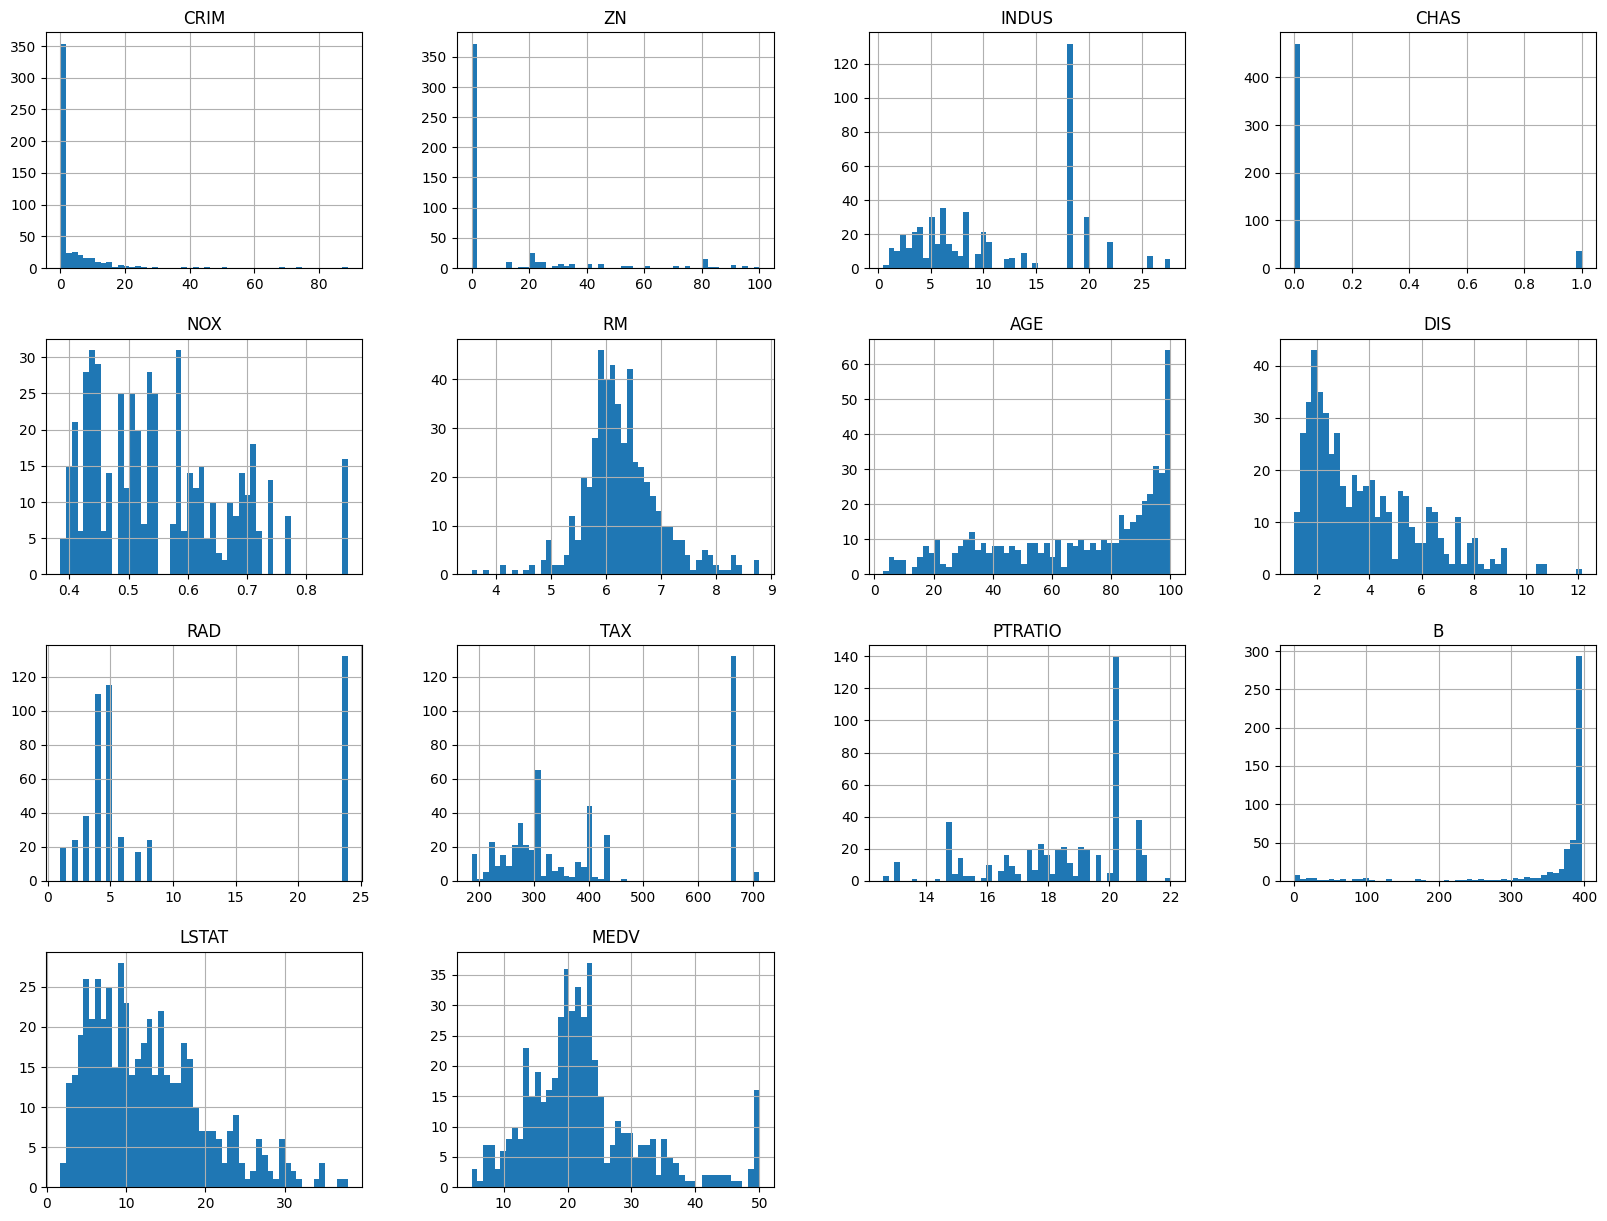

In [87]:
# hist : to get the idea of how often values are occuring 

import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(20,15))   

### Train-Test splitting

In [88]:
# SPLITTING MANUAL FINCION


# def split_train_test(data , test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))  
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[: test_set_size]
#     train_indices = shuffled[test_set_size :]
#     return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing_df, 0.2)

# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")


In [89]:
# SPLITTING BY train_test_split lib (above implementation)

# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")


### SPLITTING BY StratifiedShuffleSplit

In [90]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2 ,random_state=42)

for train_index , test_index in split.split(housing_df, housing_df['CHAS']):
    strat_train_set=housing_df.loc[train_index]
    strat_test_set=housing_df.loc[test_index]

In [91]:
print("Rows in train set:" ,len(strat_train_set),
    "\nRows in test set:", len(strat_test_set))


Rows in train set: 404 
Rows in test set: 102


In [92]:
housing_df=strat_train_set.copy()
housing_df.shape

(404, 14)

Below all work is done for training data (housing_df = training data)

### Looking for Correlations ( selecting best feature)

In [93]:
corr_matrix = housing_df.corr()

In [94]:
# corr with med value (price ~)
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [95]:
from pandas.plotting import scatter_matrix

In [96]:
features = ['RM' ,'MEDV', 'ZN']
# scatter_matrix(housing_df[features])

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

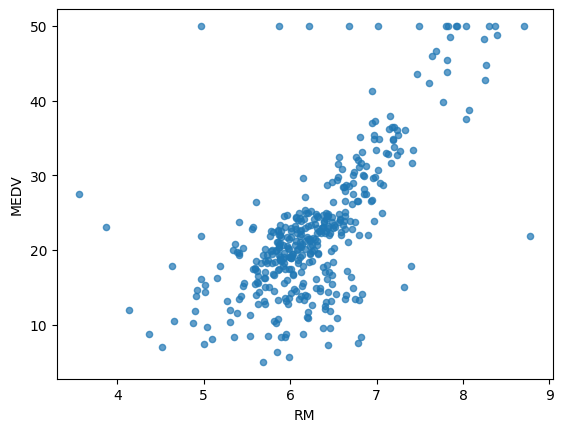

In [97]:
# can see outliers and faulty data 
housing_df.plot(kind="scatter" , x="RM", y="MEDV", alpha =0.7)

### Trying out Attribute combinations

In [98]:
#tax per room TAXPRM
housing_df['TAXPRM'] =housing_df['TAX']/housing_df['RM']
housing_df['TAXPRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXPRM, Length: 404, dtype: float64

### taking out x train and y train|

In [99]:
housing_df = strat_train_set.drop("MEDV", axis=1)  # x train
housing_labels = strat_train_set['MEDV'].copy()

### Missing attributes

In [100]:
# Taking care 
# 1. get rid of data of data points/rows (not good for large missing )
# 2. get rid of whole attribute (cant drop if imp corr feature)
# 3. set some value

In [101]:
# Handeling by sklearn

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
X= imputer.fit_transform(housing_df)

In [102]:
housing_trns = pd.DataFrame(X, columns=housing_df.columns)
housing_trns.describe()  #new filled data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


### Feature scaling 

In [103]:
# primarily 2 types :
#1. min max normalization 
      # value-min/max-min
      # MinMaxScaler in sklearn 
# standardization 
      # value- mean/std
      # standard scale 

### Creating a pipeline

In [104]:
#  performing multiple operations in a sequence,

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy='median')), # can add many
    ('std_scaler', StandardScaler())
])


In [105]:
housing_num_tr= my_pipeline.fit_transform(housing_df)

In [106]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

### SELECTING A DESIRED MODEL 

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()  
# model = DecisionTreeRegressor()  # better
model = RandomForestRegressor()

model.fit(housing_num_tr, housing_labels)


RandomForestRegressor()

In [108]:
some_data = housing_df.iloc[:5]
some_labels= housing_labels.iloc[:5]

In [109]:
prepared_data = my_pipeline.transform(some_data)

In [110]:
model.predict(prepared_data)

array([22.408, 25.275, 16.591, 23.33 , 23.521])

In [111]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

### EVALUATION OF MODEL

In [112]:
from sklearn.metrics import mean_squared_error as MSE

housing_predictions = model.predict(housing_num_tr)
rmse = MSE(housing_labels, housing_predictions,squared=False)

In [113]:
rmse 

1.2603703221711864

### UISNG BETTER EVALUATION TECHNIQUE : CROSS VALIDATION



In [114]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(model,housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)  # max uitlity

rmse_scores= np.sqrt(-scores)

In [115]:
rmse_scores  #  NUMPY ARRAY - after 10 rounds

array([2.7504017 , 2.75795858, 4.49675824, 2.79473008, 3.31073613,
       2.86519836, 4.69065844, 3.34138246, 3.41019347, 3.07346975])

In [116]:
def print_scores(scores):
    print("Scores are" , scores)
    print("Mean", scores.mean() )
    print("Standard deviation", scores.std())

print_scores(rmse_scores)

Scores are [2.7504017  2.75795858 4.49675824 2.79473008 3.31073613 2.86519836
 4.69065844 3.34138246 3.41019347 3.07346975]
Mean 3.3491487205766135
Standard deviation 0.6668964594620074


### Save model

In [117]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

### TESTING MODEL ON TEST DATA

In [118]:
X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set['MEDV'].copy()

X_test_prepapred = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepapred)

In [119]:
final_predictions

array([24.57 , 11.929, 25.489, 21.655, 18.643, 14.836, 19.564, 14.505,
       31.78 , 42.118, 19.605, 11.892, 25.241, 26.789, 19.654, 10.819,
       31.65 , 14.661, 23.622, 18.702, 19.321, 17.831, 16.888, 22.315,
       18.887, 31.336, 16.141, 32.753,  8.878, 34.167, 23.575, 21.443,
       23.256, 11.467, 20.823, 10.98 , 43.456, 24.363, 24.149, 41.612,
       24.079, 30.701, 20.68 , 21.082, 18.864, 33.115, 44.684, 20.134,
       20.358, 21.652, 21.419, 14.528, 21.115, 14.568, 24.954, 33.316,
       42.934, 29.055, 19.734, 20.511, 46.859,  9.894, 19.39 , 25.379,
       14.654, 33.729, 20.012, 17.443, 18.837, 34.64 , 27.428, 22.867,
       21.286, 22.369, 34.536, 12.781, 15.713, 20.062, 21.044, 21.43 ,
       22.384, 21.081, 13.998, 23.228, 21.132, 21.026, 14.596, 21.861,
       21.319, 23.72 , 18.352, 27.253,  7.148, 26.636, 18.54 , 29.211,
       19.872, 32.493, 14.342, 27.138, 21.448, 20.191])

In [120]:
y_test

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

In [121]:
final_rmse= MSE(y_test, final_predictions, squared=False)
final_rmse 

2.943709641078818

****

In [122]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

### USING THE MODEL


In [123]:
from joblib import dump, load
import numpy as np

model = load('Dragon.joblib')
feature = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
                    -0.23979304, -1.31238772,  2.61111401, -1.0016859, -0.5778192,
                    -0.97491834,  0.41164221, -0.86091034]])
model.predict(feature)


array([22.408])